# CODICE FINALE!

In [197]:
# Importare le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Caricamento del dataset
file_path = '../Datasets/atp_tennis.csv'
data = pd.read_csv(file_path)

# Esplorazione iniziale del dataset
print("Anteprima del dataset:")
print(data.head())
print("\nInformazioni sul dataset:")
print(data.info())

Anteprima del dataset:
                           Tournament    Country        Date         Series  \
0  Australian Hardcourt Championships  Australia  2000-01-03  International   
1  Australian Hardcourt Championships  Australia  2000-01-03  International   
2  Australian Hardcourt Championships  Australia  2000-01-03  International   
3  Australian Hardcourt Championships  Australia  2000-01-03  International   
4  Australian Hardcourt Championships  Australia  2000-01-03  International   

     Court Surface      Round  Best of        Player_1       Player_2  \
0  Outdoor    Hard  1st Round        3      Dosedel S.    Ljubicic I.   
1  Outdoor    Hard  1st Round        3      Clement A.     Enqvist T.   
2  Outdoor    Hard  1st Round        3       Escude N.  Baccanello P.   
3  Outdoor    Hard  1st Round        3  Knippschild J.     Federer R.   
4  Outdoor    Hard  1st Round        3     Fromberg R.  Woodbridge T.   

        Winner  Rank_1  Rank_2  Pts_1  Pts_2  Odd_1  Odd_2     

In [198]:
# Pulizia preliminare: rimuovere righe con NaN o 0 nelle colonne numeriche
numeric_columns = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2']  # Specificare le colonne numeriche rilevanti
data[numeric_columns] = data[numeric_columns].replace(0, np.nan)  # Convertire gli zeri in NaN
data_cleaned = data.dropna(subset=numeric_columns)  # Rimuovere righe con NaN

# Verifica dopo la pulizia
print("\nDati puliti: righe rimosse dove le colonne numeriche avevano NaN o 0")
print(f"Righe originali: {len(data)}, Righe dopo pulizia: {len(data_cleaned)}")
print("\nAnteprima dei dati puliti:")
print(data_cleaned.head())



Dati puliti: righe rimosse dove le colonne numeriche avevano NaN o 0
Righe originali: 64166, Righe dopo pulizia: 48513

Anteprima dei dati puliti:
         Tournament Country        Date         Series    Court Surface  \
15652  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15653  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15654  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15655  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15656  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   

           Round  Best of       Player_1        Player_2          Winner  \
15652  1st Round        3     Robredo T.       Tabara M.      Robredo T.   
15653  1st Round        3  Ryderstedt M.  Vinciguerra A.  Vinciguerra A.   
15654  1st Round        3     Youzhny M.      Haehnel J.      Youzhny M.   
15655  1st Round        3      Dlouhy L.    Ferrero J.C.    Ferrero J.C.   
15656  1st Round     

In [199]:
# Identificare le colonne numeriche
numeric_columns = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2']  # Specificare le colonne numeriche rilevanti

# Contare i valori non validi prima della pulizia
invalid_counts_before = data[numeric_columns].isna().sum() + (data[numeric_columns] == 0).sum()
print("\nValori non validi (NaN o 0) prima della pulizia:")
print(invalid_counts_before)

# Pulizia preliminare: rimuovere righe con NaN o 0 nelle colonne numeriche
data[numeric_columns] = data[numeric_columns].replace(0, np.nan)  # Convertire gli zeri in NaN
data_cleaned = data.dropna(subset=numeric_columns)  # Rimuovere righe con NaN

# Contare i valori non validi dopo la pulizia
invalid_counts_after = data_cleaned[numeric_columns].isna().sum() + (data_cleaned[numeric_columns] == 0).sum()
print("\nValori non validi (NaN o 0) dopo la pulizia:")
print(invalid_counts_after)

# Verifica dopo la pulizia
print("\nDati puliti: righe rimosse dove le colonne numeriche avevano NaN o 0")
print(f"Righe originali: {len(data)}, Righe dopo pulizia: {len(data_cleaned)}")
print("\nAnteprima dei dati puliti:")
print(data_cleaned.head())


Valori non validi (NaN o 0) prima della pulizia:
Rank_1       14
Rank_2       12
Pts_1     15652
Pts_2     15653
dtype: int64

Valori non validi (NaN o 0) dopo la pulizia:
Rank_1    0
Rank_2    0
Pts_1     0
Pts_2     0
dtype: int64

Dati puliti: righe rimosse dove le colonne numeriche avevano NaN o 0
Righe originali: 64166, Righe dopo pulizia: 48513

Anteprima dei dati puliti:
         Tournament Country        Date         Series    Court Surface  \
15652  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15653  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15654  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15655  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15656  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   

           Round  Best of       Player_1        Player_2          Winner  \
15652  1st Round        3     Robredo T.       Tabara M.      Robredo T.   
15653  1st Roun

In [200]:
# Verifica della colonna "Score"
print("\nControllo della colonna 'Score':")

# Valori mancanti o vuoti
invalid_score_count = data['Score'].isna().sum() + (data['Score'].str.strip() == "").sum()
print(f"Numero di valori non validi (NaN o vuoti): {invalid_score_count}")

# Controllo del formato corretto
import re

# Definizione di un pattern regex per verificare punteggi nel formato valido (esempio: 6-4 6-3)
score_pattern = r'^(\d+-\d+\s?)+$'
invalid_format_count = data[~data['Score'].str.match(score_pattern, na=False)].shape[0]
print(f"Numero di punteggi con formato non valido: {invalid_format_count}")

# Rimuovere righe con punteggi non validi o NaN
data_cleaned = data_cleaned[data_cleaned['Score'].notna()]  # Rimuovi NaN
data_cleaned = data_cleaned[data_cleaned['Score'].str.strip() != ""]  # Rimuovi stringhe vuote
data_cleaned = data_cleaned[data_cleaned['Score'].str.match(score_pattern)]  # Rimuovi formati non validi

# Verifica dopo la pulizia
print(f"Righe dopo la pulizia della colonna 'Score': {len(data_cleaned)}")
print("\nAnteprima dei dati puliti:")
print(data_cleaned.head())


Controllo della colonna 'Score':
Numero di valori non validi (NaN o vuoti): 0
Numero di punteggi con formato non valido: 0
Righe dopo la pulizia della colonna 'Score': 48513

Anteprima dei dati puliti:
         Tournament Country        Date         Series    Court Surface  \
15652  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15653  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15654  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15655  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15656  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   

           Round  Best of       Player_1        Player_2          Winner  \
15652  1st Round        3     Robredo T.       Tabara M.      Robredo T.   
15653  1st Round        3  Ryderstedt M.  Vinciguerra A.  Vinciguerra A.   
15654  1st Round        3     Youzhny M.      Haehnel J.      Youzhny M.   
15655  1st Round        3      Dlouhy L.  

In [201]:
# Feature: Ranking massimo e medio
data_cleaned['Max_Rank_1'] = data_cleaned.groupby('Player_1')['Rank_1'].transform('min')
data_cleaned['Max_Rank_2'] = data_cleaned.groupby('Player_2')['Rank_2'].transform('min')
data_cleaned['Avg_Rank_1'] = data_cleaned.groupby('Player_1')['Rank_1'].transform('mean')
data_cleaned['Avg_Rank_2'] = data_cleaned.groupby('Player_2')['Rank_2'].transform('mean')

max_rank = pd.concat([
    data_cleaned[['Player_1', 'Max_Rank_1']].rename(columns={'Player_1': 'Player', 'Max_Rank_1': 'Max_Rank'}),
    data_cleaned[['Player_2', 'Max_Rank_2']].rename(columns={'Player_2': 'Player', 'Max_Rank_2': 'Max_Rank'})
])

avg_rank = pd.concat([
    data_cleaned[['Player_1', 'Avg_Rank_1']].rename(columns={'Player_1': 'Player', 'Avg_Rank_1': 'Avg_Rank'}),
    data_cleaned[['Player_2', 'Avg_Rank_2']].rename(columns={'Player_2': 'Player', 'Avg_Rank_2': 'Avg_Rank'})
])

max_rank = max_rank.groupby('Player')['Max_Rank'].min().reset_index()
avg_rank = avg_rank.groupby('Player')['Avg_Rank'].mean().reset_index()

In [202]:
# Feature: Punti massimi e medi
max_points = pd.concat([
    data_cleaned[['Player_1', 'Pts_1']].rename(columns={'Player_1': 'Player', 'Pts_1': 'Max_Points'}),
    data_cleaned[['Player_2', 'Pts_2']].rename(columns={'Player_2': 'Player', 'Pts_2': 'Max_Points'})
])

avg_points = pd.concat([
    data_cleaned[['Player_1', 'Pts_1']].rename(columns={'Player_1': 'Player', 'Pts_1': 'Avg_Points'}),
    data_cleaned[['Player_2', 'Pts_2']].rename(columns={'Player_2': 'Player', 'Pts_2': 'Avg_Points'})
])

max_points = max_points.groupby('Player')['Max_Points'].max().reset_index()
avg_points = avg_points.groupby('Player')['Avg_Points'].mean().reset_index()

In [203]:
# Calcolare il totale delle partite giocate
total_matches = pd.concat([data_cleaned['Player_1'], data_cleaned['Player_2']]).value_counts()
total_matches = total_matches.rename('Total_Matches').reset_index()
total_matches = total_matches.rename(columns={'index': 'Player'})

In [204]:
# Calcolare il numero totale di vittorie
total_wins = data_cleaned['Winner'].value_counts().rename('Total_Wins').reset_index()
total_wins = total_wins.rename(columns={'index': 'Player'})

In [205]:
# Rinominare la colonna 'Winner' in 'Player' nel dataframe 'total_wins'
total_wins = total_wins.rename(columns={'Winner': 'Player'})

# Calcolare la percentuale di vittorie
win_percentage = total_wins.merge(total_matches, on='Player', how='left')
win_percentage['Win_Percentage'] = win_percentage['Total_Wins'] / win_percentage['Total_Matches'] * 100

print("\nCalcolo della percentuale di vittorie (Win_Percentage):")
print(win_percentage.head())


Calcolo della percentuale di vittorie (Win_Percentage):
        Player  Total_Wins  Total_Matches  Win_Percentage
0  Djokovic N.        1016           1201       84.596170
1     Nadal R.         923           1096       84.215328
2   Federer R.         830            979       84.780388
3    Murray A.         666            917       72.628135
4    Ferrer D.         594            874       67.963387


In [206]:
# Feature: Performance per superficie
surface_wins_1 = pd.crosstab(data_cleaned['Player_1'], data_cleaned['Surface'])
surface_wins_2 = pd.crosstab(data_cleaned['Player_2'], data_cleaned['Surface'])
surface_wins_combined = surface_wins_1.add(surface_wins_2, fill_value=0)
surface_wins_combined.columns = [f"Wins_{surface}" for surface in surface_wins_combined.columns]

# Calcolo del totale delle partite giocate
total_matches = pd.concat([data_cleaned['Player_1'], data_cleaned['Player_2']]).value_counts()
total_matches = total_matches.rename('Total_Matches').reset_index()

# Unire i dati delle vittorie per superficie con il totale delle partite
player_stats = surface_wins_combined.merge(total_matches, left_index=True, right_on='index', how='left')
player_stats = player_stats.rename(columns={'index': 'Player'})

# Calcolare le percentuali di vittorie per superficie
for surface in ['Clay', 'Hard', 'Grass']:
    col_name = f"Wins_{surface}"
    if col_name in player_stats.columns:
        player_stats[f"Win_Percentage_{surface}"] = player_stats[col_name] / player_stats['Total_Matches']

print("\nStatistiche di performance per superficie (anteprima):")
print(player_stats.head())


Statistiche di performance per superficie (anteprima):
      Wins_Clay  Wins_Grass  Wins_Hard         Player  Total_Matches  \
1048        2.0         0.0        0.0       Hajek J.              2   
169       113.0         0.0       81.0     Acasuso J.            194   
1313        0.0         0.0        1.0  Adaktusson J.              1   
743         5.0         0.0        0.0   Agamenone F.              5   
419         0.0         4.0       33.0      Agassi A.             37   

      Win_Percentage_Clay  Win_Percentage_Hard  Win_Percentage_Grass  
1048             1.000000             0.000000              0.000000  
169              0.582474             0.417526              0.000000  
1313             0.000000             1.000000              0.000000  
743              1.000000             0.000000              0.000000  
419              0.000000             0.891892              0.108108  


In [207]:
# Feature: Prestazioni nei tornei principali
# Calcolare vittorie nei Grand Slam e Masters 1000 separatamente
data_cleaned['Grand_Slam_Win_1'] = data_cleaned.apply(
    lambda row: 1 if row['Series'] == 'Grand Slam' and row['Winner'] == row['Player_1'] else 0, axis=1
)
data_cleaned['Grand_Slam_Win_2'] = data_cleaned.apply(
    lambda row: 1 if row['Series'] == 'Grand Slam' and row['Winner'] == row['Player_2'] else 0, axis=1
)

data_cleaned['Masters_1000_Win_1'] = data_cleaned.apply(
    lambda row: 1 if row['Series'] == 'Masters 1000' and row['Winner'] == row['Player_1'] else 0, axis=1
)
data_cleaned['Masters_1000_Win_2'] = data_cleaned.apply(
    lambda row: 1 if row['Series'] == 'Masters 1000' and row['Winner'] == row['Player_2'] else 0, axis=1
)

# Aggregare i dati per ogni giocatore
grand_slam_wins = data_cleaned.groupby('Player_1')['Grand_Slam_Win_1'].sum() + \
                  data_cleaned.groupby('Player_2')['Grand_Slam_Win_2'].sum()
masters_1000_wins = data_cleaned.groupby('Player_1')['Masters_1000_Win_1'].sum() + \
                    data_cleaned.groupby('Player_2')['Masters_1000_Win_2'].sum()

# Creare un dataframe con le vittorie aggregate
major_wins = pd.DataFrame({
    'Player': grand_slam_wins.index,
    'Grand_Slam_Wins': grand_slam_wins.values,
    'Masters_1000_Wins': masters_1000_wins.values
})

print("\nStatistiche delle vittorie nei tornei principali (Grand Slam e Masters 1000):")
print(major_wins.head())


Statistiche delle vittorie nei tornei principali (Grand Slam e Masters 1000):
          Player  Grand_Slam_Wins  Masters_1000_Wins
0       Hajek J.              NaN                NaN
1     Acasuso J.              8.0                1.0
2  Adaktusson J.              NaN                NaN
3   Agamenone F.              0.0                0.0
4      Agassi A.             10.0                0.0


In [208]:
# Controllo delle colonne nei dataframe da unire
print("Colonne di max_rank:", max_rank.columns)
print("Colonne di avg_rank:", avg_rank.columns)
print("Colonne di max_points:", max_points.columns)
print("Colonne di avg_points:", avg_points.columns)
print("Colonne di player_stats:", player_stats.columns)
print("Colonne di major_wins:", major_wins.columns)

# Se necessario, rinomina le colonne per assicurarti che abbiano il nome corretto
if 'index' in player_stats.columns:
    player_stats = player_stats.rename(columns={'index': 'Player'})

Colonne di max_rank: Index(['Player', 'Max_Rank'], dtype='object')
Colonne di avg_rank: Index(['Player', 'Avg_Rank'], dtype='object')
Colonne di max_points: Index(['Player', 'Max_Points'], dtype='object')
Colonne di avg_points: Index(['Player', 'Avg_Points'], dtype='object')
Colonne di player_stats: Index(['Wins_Clay', 'Wins_Grass', 'Wins_Hard', 'Player', 'Total_Matches',
       'Win_Percentage_Clay', 'Win_Percentage_Hard', 'Win_Percentage_Grass'],
      dtype='object')
Colonne di major_wins: Index(['Player', 'Grand_Slam_Wins', 'Masters_1000_Wins'], dtype='object')


In [209]:
# Controllare i nomi delle colonne in tutti i dataframe coinvolti nel merge
dataframes = {
    "max_rank": max_rank,
    "avg_rank": avg_rank,
    "max_points": max_points,
    "avg_points": avg_points,
    "total_matches": total_matches,
    "total_wins": total_wins,
    "win_percentage": win_percentage,
    "player_stats": player_stats,
    "major_wins": major_wins
}

for name, df in dataframes.items():
    print(f"Colonne di {name}: {df.columns}")

Colonne di max_rank: Index(['Player', 'Max_Rank'], dtype='object')
Colonne di avg_rank: Index(['Player', 'Avg_Rank'], dtype='object')
Colonne di max_points: Index(['Player', 'Max_Points'], dtype='object')
Colonne di avg_points: Index(['Player', 'Avg_Points'], dtype='object')
Colonne di total_matches: Index(['index', 'Total_Matches'], dtype='object')
Colonne di total_wins: Index(['Player', 'Total_Wins'], dtype='object')
Colonne di win_percentage: Index(['Player', 'Total_Wins', 'Total_Matches', 'Win_Percentage'], dtype='object')
Colonne di player_stats: Index(['Wins_Clay', 'Wins_Grass', 'Wins_Hard', 'Player', 'Total_Matches',
       'Win_Percentage_Clay', 'Win_Percentage_Hard', 'Win_Percentage_Grass'],
      dtype='object')
Colonne di major_wins: Index(['Player', 'Grand_Slam_Wins', 'Masters_1000_Wins'], dtype='object')


In [210]:
# Rinomina la colonna 'index' in 'Player' nel dataframe 'total_matches'
total_matches = total_matches.rename(columns={'index': 'Player'})

# Riunire tutte le feature in un unico dataset
player_summary = max_rank.merge(avg_rank, on='Player', how='left')
player_summary = player_summary.merge(max_points, on='Player', how='left')
player_summary = player_summary.merge(avg_points, on='Player', how='left')
player_summary = player_summary.merge(total_matches, on='Player', how='left')
player_summary = player_summary.merge(total_wins, on='Player', how='left')
player_summary = player_summary.merge(win_percentage[['Player', 'Win_Percentage']], on='Player', how='left')
player_summary = player_summary.merge(player_stats, on='Player', how='left')
player_summary = player_summary.merge(major_wins, on='Player', how='left')

# Verifica del dataset finale
print("\nDataset finale per il clustering:")
print(player_summary.head())


Dataset finale per il clustering:
          Player  Max_Rank    Avg_Rank  Max_Points   Avg_Points  \
0       Hajek J.      79.0   79.000000       506.0   506.000000   
1     Acasuso J.      20.0   47.969072      1640.0   885.463918   
2  Adaktusson J.     265.0  265.000000       133.0   133.000000   
3   Agamenone F.     136.0  140.000000       407.0   399.800000   
4      Agassi A.       5.0   12.513514      2275.0  1830.540541   

   Total_Matches_x  Total_Wins  Win_Percentage  Wins_Clay  Wins_Grass  \
0                2         1.0       50.000000        2.0         0.0   
1              194       103.0       53.092784      113.0         0.0   
2                1         NaN             NaN        0.0         0.0   
3                5         3.0       60.000000        5.0         0.0   
4               37        26.0       70.270270        0.0         4.0   

   Wins_Hard  Total_Matches_y  Win_Percentage_Clay  Win_Percentage_Hard  \
0        0.0                2             1.0000

In [211]:
# Verifica i nomi delle colonne dopo il merge
print("Colonne di player_summary:", player_summary.columns)

# Rinominare una delle colonne duplicate, se necessario
if 'Total_Matches_x' in player_summary.columns:
    player_summary = player_summary.rename(columns={'Total_Matches_x': 'Total_Matches'})

# Rimuovere la colonna 'Total_Matches_y', se presente
if 'Total_Matches_y' in player_summary.columns:
    player_summary = player_summary.drop(columns=['Total_Matches_y'])
    print("Colonna 'Total_Matches_y' eliminata.")

# Applicare il filtro per rimuovere i giocatori con meno di 100 partite
min_matches = 30
print(f"\nNumero di giocatori prima di aver rimosso quelli con meno di {min_matches} partite: {len(player_summary)}")
player_summary = player_summary[player_summary['Total_Matches'] >= min_matches]

print(f"Numero di giocatori dopo aver rimosso quelli con meno di {min_matches} partite: {len(player_summary)}")

# Sostituire i valori NaN con 0
player_summary = player_summary.fillna(0)

print("\nDataset finale per il clustering (dopo pulizia):")
print(player_summary.head())

Colonne di player_summary: Index(['Player', 'Max_Rank', 'Avg_Rank', 'Max_Points', 'Avg_Points',
       'Total_Matches_x', 'Total_Wins', 'Win_Percentage', 'Wins_Clay',
       'Wins_Grass', 'Wins_Hard', 'Total_Matches_y', 'Win_Percentage_Clay',
       'Win_Percentage_Hard', 'Win_Percentage_Grass', 'Grand_Slam_Wins',
       'Masters_1000_Wins'],
      dtype='object')
Colonna 'Total_Matches_y' eliminata.

Numero di giocatori prima di aver rimosso quelli con meno di 30 partite: 1369
Numero di giocatori dopo aver rimosso quelli con meno di 30 partite: 446

Dataset finale per il clustering (dopo pulizia):
        Player  Max_Rank   Avg_Rank  Max_Points   Avg_Points  Total_Matches  \
1   Acasuso J.      20.0  47.969072      1640.0   885.463918            194   
4    Agassi A.       5.0  12.513514      2275.0  1830.540541             37   
11    Albot R.      39.0  93.027027      1137.0   686.860360            222   
13  Alcaraz C.       1.0  22.163866      9815.0  5484.743697            238   

### Distribuzioni descrittive

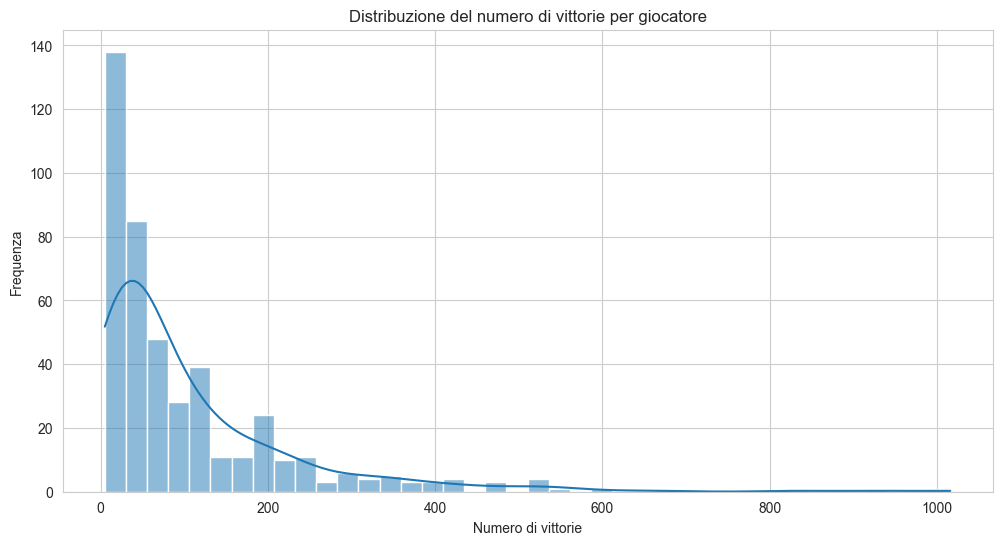

In [212]:
# 1. Distribuzione del numero di vittorie
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.histplot(data=player_summary['Total_Wins'], kde=True, bins=40)
plt.title('Distribuzione del numero di vittorie per giocatore')
plt.xlabel('Numero di vittorie')
plt.ylabel('Frequenza')
plt.show()

### La relazione tra ranking e vittorie

<Figure size 1800x1200 with 0 Axes>

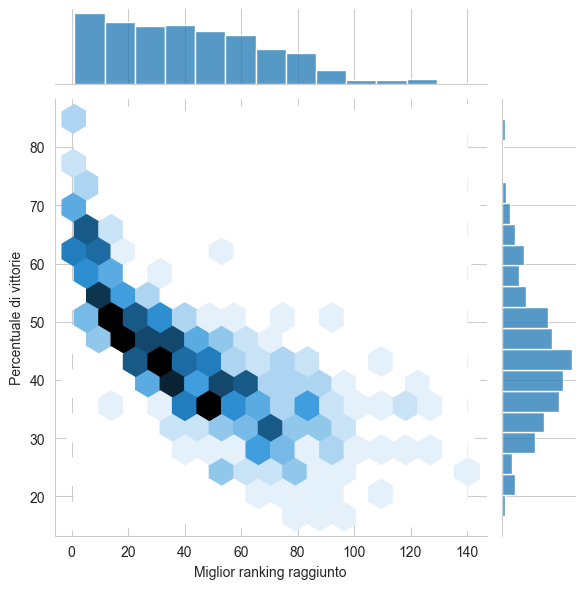

In [213]:
# 2. Relazione tra vittorie e ranking migliore
plt.figure(figsize=(18, 12))
sns.set_style('whitegrid')
sns.jointplot(data=player_summary, x='Max_Rank', y='Win_Percentage', kind='hex')
plt.xlabel('Miglior ranking raggiunto')
plt.ylabel('Percentuale di vittorie')
plt.show()

<Figure size 1800x1200 with 0 Axes>

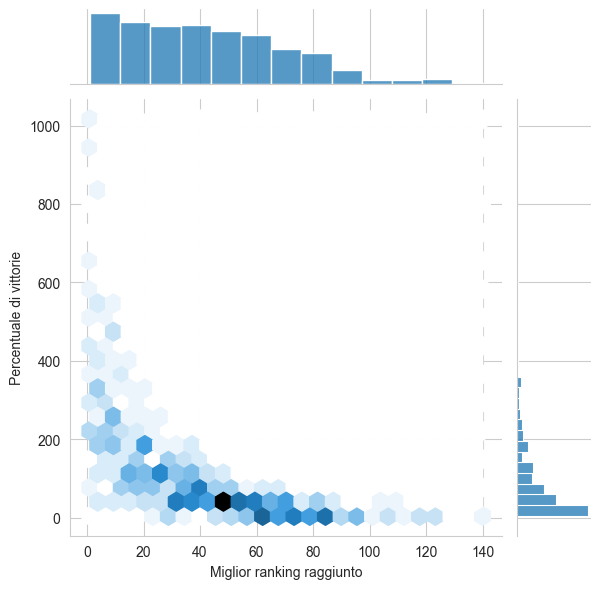

In [214]:
# 2. Relazione tra vittorie e ranking migliore
plt.figure(figsize=(18, 12))
sns.set_style('whitegrid')
sns.jointplot(data=player_summary, x='Max_Rank', y='Total_Wins', kind='hex')
plt.xlabel('Miglior ranking raggiunto')
plt.ylabel('Percentuale di vittorie')
plt.show()

### Come si distribuiscono le vittorie sulle diverse superfici

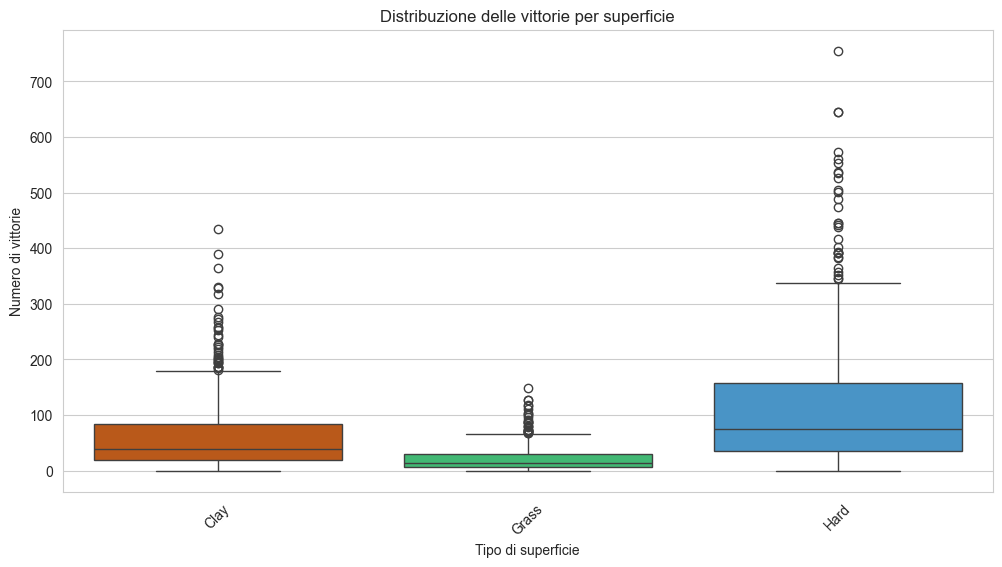

In [215]:
# 3. Distribuzione delle vittorie per superficie
surface_columns = ['Wins_Clay', 'Wins_Grass', 'Wins_Hard']
surface_data = player_summary[surface_columns]

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Definiamo i colori per ogni superficie
colors = {
    'Wins_Clay': '#d35400',  # Arancio scuro
    'Wins_Grass': '#2ecc71',  # Verde
    'Wins_Hard': '#3498db'   # Blu
}

# Creiamo il boxplot con i colori personalizzati
sns.boxplot(data=surface_data, palette=[colors[col] for col in surface_columns])

plt.title('Distribuzione delle vittorie per superficie')
plt.xlabel('Tipo di superficie')
plt.ylabel('Numero di vittorie')
surfaces = ["Clay", "Grass", "Hard"]
plt.xticks(ticks=range(len(surfaces)), labels=surfaces, rotation=45)
plt.show()

### Chi sono i giocatori più attivi?


/var/folders/zt/9ggmn83106zfjymwl_r2kkdh0000gn/T/ipykernel_28038/1257149416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


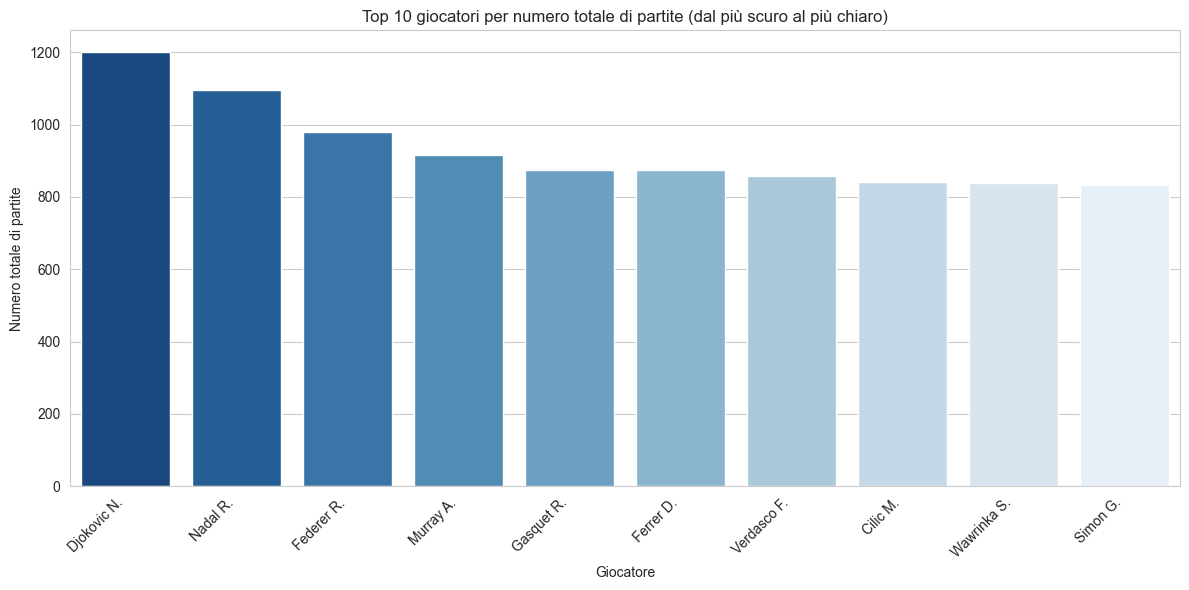

In [216]:
# 4. Top 10 giocatori per numero totale di partite con il primo più scuro e l'ultimo più chiaro
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Ordinare i top 10 giocatori per numero di partite
top_10_matches = player_summary.nlargest(10, 'Total_Matches')

# Creare una palette di colori e invertirla
colors = sns.color_palette('Blues', len(top_10_matches))[::-1]

# Creare l'istogramma con la palette invertita
sns.barplot(
    data=top_10_matches,
    x=top_10_matches.Player,
    y='Total_Matches',
    palette=colors
)

plt.title('Top 10 giocatori per numero totale di partite (dal più scuro al più chiaro)')
plt.xlabel('Giocatore')
plt.ylabel('Numero totale di partite')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Come sono correlate le diverse statistiche tra loro?

La matrice di correlazione è uno strumento molto utile per capire come le variabili del tuo dataset siano collegate tra loro. Essa mostra quanto due variabili siano correlate tra loro: se il valore della correlazione è vicino a 1, significa che c’è una forte correlazione positiva, se è vicino a -1, c’è una forte correlazione negativa, mentre un valore vicino a 0 indica che non c’è correlazione.

Passaggi per calcolare e visualizzare la matrice di correlazione:

1.	Calcolare la matrice di correlazione: Usiamo la funzione .corr() di Pandas, che calcola la correlazione tra le variabili numeriche nel DataFrame.
    
2.	Visualizzare la matrice di correlazione: Usiamo una heatmap per visualizzare la matrice, che rende più facile interpretare i valori di correlazione.

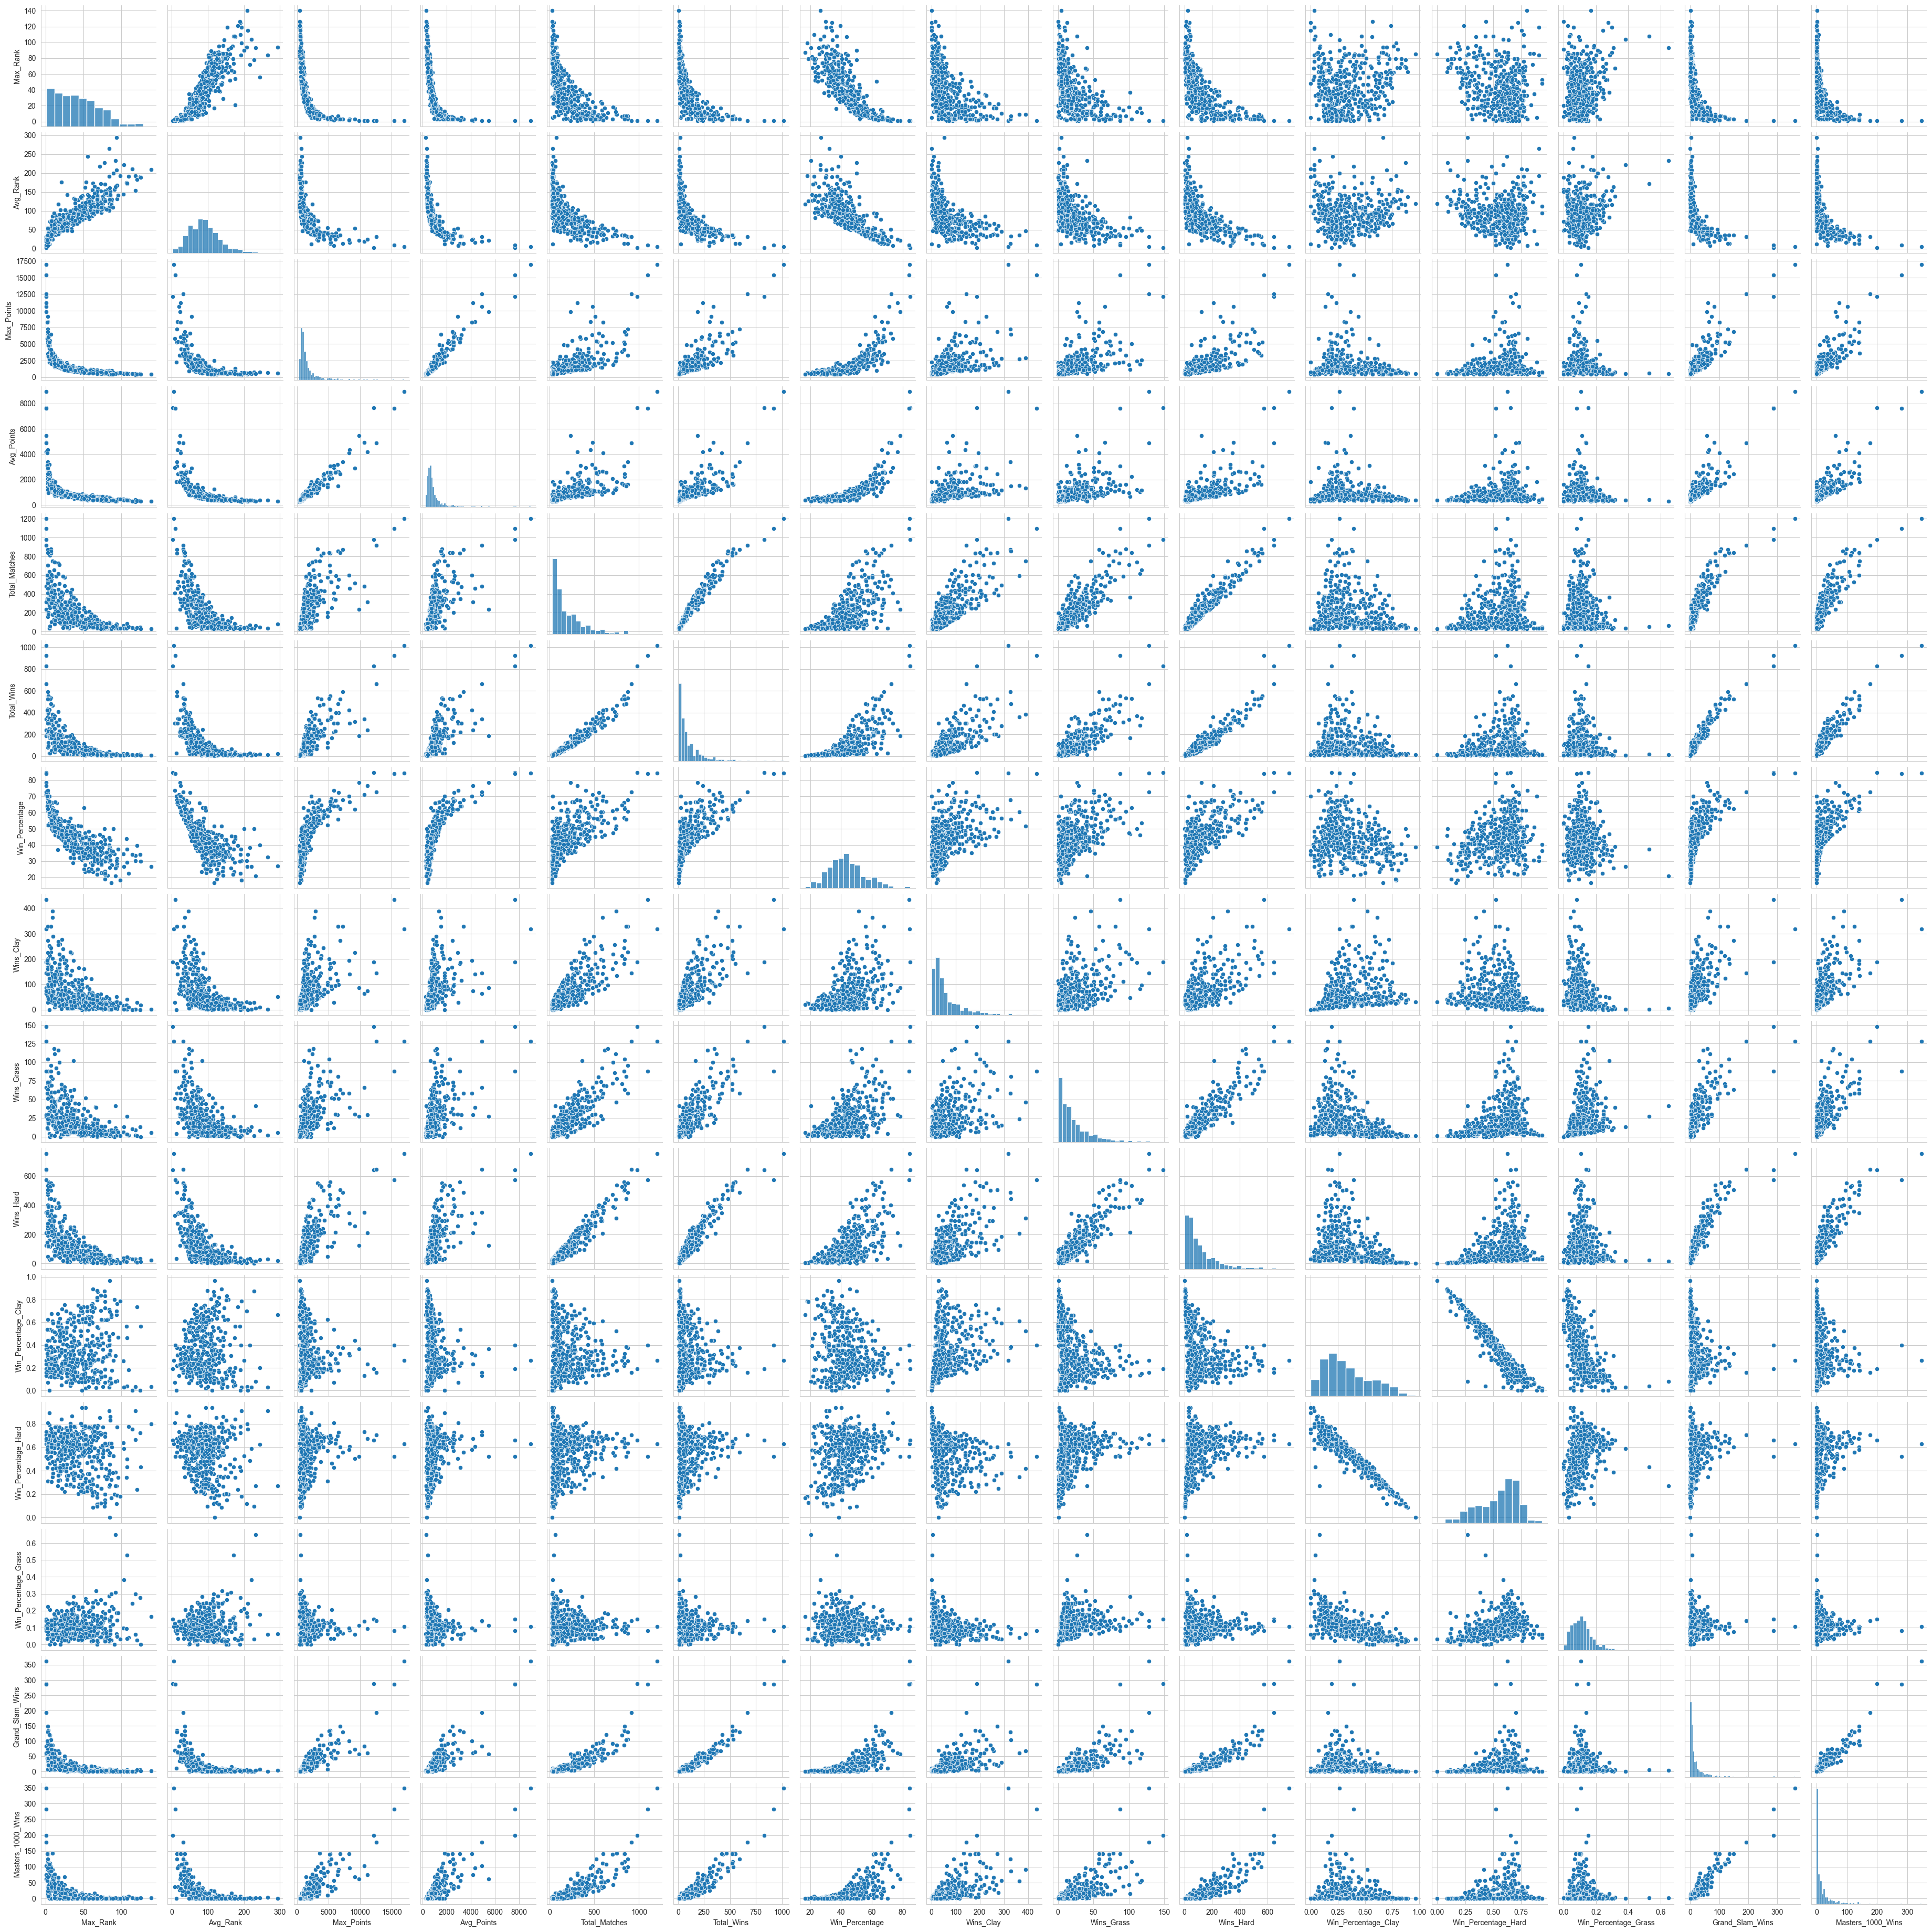

In [217]:
# sns.pairplot(): È una funzione di Seaborn che genera un pairplot, ovvero una matrice di grafici a dispersione tra tutte le coppie di colonne del DataFrame. 
# Inoltre, genera anche istogrammi lungo la diagonale per mostrare la distribuzione di ciascuna variabile.

sns.pairplot(player_summary)
plt.show()

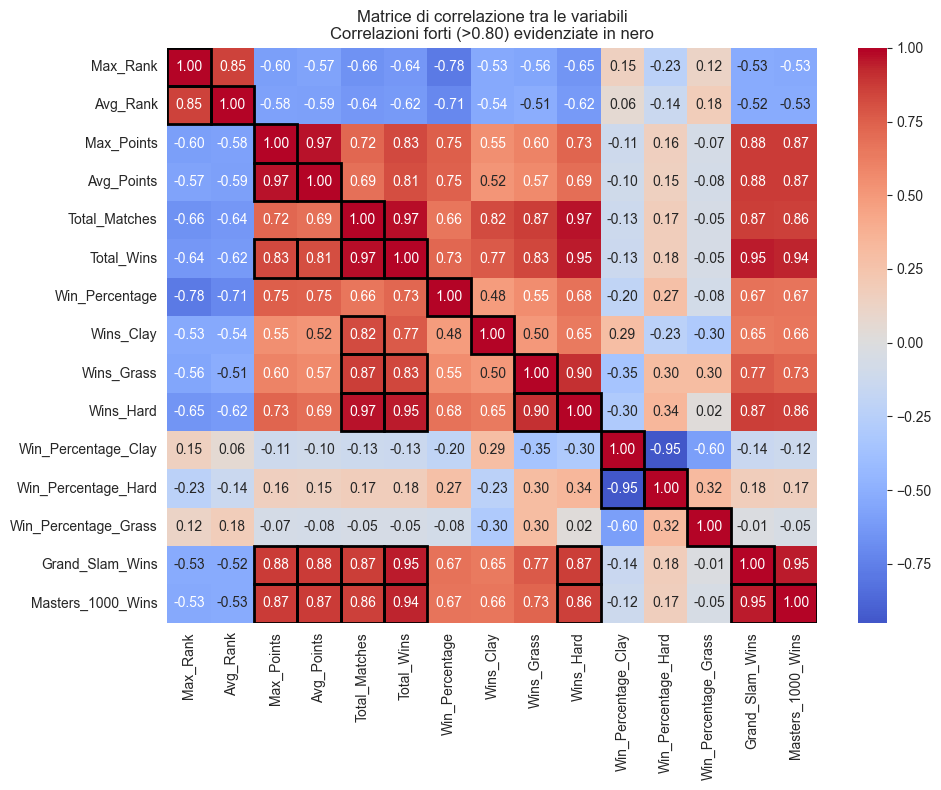

Numero totale di correlazioni possibili: 105

Numero di correlazioni forti (>0.80): 38
Percentuale di correlazioni forti: 36.19%

Correlazioni forti (>0.80):
Max_Rank - Max_Rank: 1.00
Avg_Rank - Max_Rank: 0.85
Avg_Rank - Avg_Rank: 1.00
Max_Points - Max_Points: 1.00
Avg_Points - Max_Points: 0.97
Avg_Points - Avg_Points: 1.00
Total_Matches - Total_Matches: 1.00
Total_Wins - Max_Points: 0.83
Total_Wins - Avg_Points: 0.81
Total_Wins - Total_Matches: 0.97
Total_Wins - Total_Wins: 1.00
Win_Percentage - Win_Percentage: 1.00
Wins_Clay - Total_Matches: 0.82
Wins_Clay - Wins_Clay: 1.00
Wins_Grass - Total_Matches: 0.87
Wins_Grass - Total_Wins: 0.83
Wins_Grass - Wins_Grass: 1.00
Wins_Hard - Total_Matches: 0.97
Wins_Hard - Total_Wins: 0.95
Wins_Hard - Wins_Grass: 0.90
Wins_Hard - Wins_Hard: 1.00
Win_Percentage_Clay - Win_Percentage_Clay: 1.00
Win_Percentage_Hard - Win_Percentage_Clay: -0.95
Win_Percentage_Hard - Win_Percentage_Hard: 1.00
Win_Percentage_Grass - Win_Percentage_Grass: 1.00
Grand_Slam_

In [218]:
plt.figure(figsize=(10, 8))

# Calcoliamo la matrice di correlazione
correlation_matrix = player_summary.select_dtypes(include=['float64', 'int64']).corr()

# Creiamo una maschera per il triangolo superiore
mask_upper = np.triu(np.ones_like(correlation_matrix), k=1)

# Creiamo una maschera per le correlazioni forti
mask_strong = np.abs(correlation_matrix.values) > 0.8
mask_strong[mask_upper.astype(bool)] = False

# Visualizziamo la matrice di correlazione
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            center=0)

# Evidenziamo le correlazioni forti
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if mask_strong[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=2))

plt.title('Matrice di correlazione tra le variabili\nCorrelazioni forti (>0.80) evidenziate in nero')
plt.tight_layout()
plt.show()

# Contiamo il numero di correlazioni forti e totali
n_strong_correlations = np.sum(mask_strong)
n_total_correlations = (len(correlation_matrix) * (len(correlation_matrix) - 1)) // 2  # solo triangolo inferiore

print(f"Numero totale di correlazioni possibili: {n_total_correlations}")
print(f"\nNumero di correlazioni forti (>0.80): {n_strong_correlations}")
print(f"Percentuale di correlazioni forti: {(n_strong_correlations/n_total_correlations)*100:.2f}%")

print("\nCorrelazioni forti (>0.80):")
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if mask_strong[i, j]:
            print(f"{correlation_matrix.index[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

## PCA

La PCA (Principal Component Analysis) è una tecnica di riduzione della dimensionalità che consente di ridurre il numero di variabili, mantenendo la maggior parte dell’informazione (varianza) del dataset originale. PCA trova delle combinazioni lineari delle variabili originali chiamate componenti principali che spiegano la maggior parte della varianza nel dataset.

Quando hai un dataset con molte feature correlate, come nel tuo caso, la PCA ti permette di ridurre il numero di variabili senza perdere informazioni cruciali, migliorando l’efficienza computazionale e la comprensibilità del modello.

Passaggi per applicare PCA:

1.	Preparare i dati: È importante normalizzare i dati prima di applicare la PCA, poiché PCA è sensibile alla scala delle variabili.

2.	Applicare PCA: Usare PCA di Scikit-learn per ridurre il numero di componenti.

3.	Scegliere il numero di componenti: Decidere quante componenti principali mantenere. Generalmente si mantiene abbastanza componenti per spiegare una percentuale significativa della varianza (ad esempio, l’80% della varianza).

Codice per applicare la PCA:

1.	Normalizzazione dei Dati: Prima di applicare PCA, bisogna normalizzare i dati (ridurre i valori a una scala comune).

2.	Applicazione della PCA: Dopo aver normalizzato i dati, possiamo applicare la PCA e ridurre il numero di componenti.

In [228]:
%pip install KMeans

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
import warnings
from sklearn.cluster import DBSCAN # To instantiate and fit the model
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import kmeans

In [233]:
df_player_stats_std = KMeans.normalize_df(player_summary.drop(columns=["Player"]))
KMeans.plot_variance_ratio(df_player_stats_std)

AttributeError: module 'kmeans' has no attribute 'normalize_df'